In [1]:
import numpy as np
import pandas as pd
from src.measurements import Measurements
from src.run import sample_measurement
from src.config import Config
import warnings

warnings.filterwarnings('ignore')

Organization for helpful written instructions:
 - things you need to change
 - input check information
 - outputs and diagnostics
 - commentary about what to look for (red flags and green)

In [2]:
DATAFILE = 'data/Pickard_NH_fish.csv'
SAMPLE_NUMBER = 0

In [3]:

df = pd.read_csv(DATAFILE)
df.head()

,Sample,Units,config,C3pre,C4pre,C5pre,C6pre,C7pre,C8pre,C3post,...,7:3 FTmeas,8:2 FTmeas,C4 ECFmeas,C5 ECFmeas,C6 ECFmeas,C7 ECFmeas,C8 ECFmeas,PFOS,PFOSMDL,CXerr
0,LOC3PS2,nM,unknown_fish.yaml,0,0,0,0.026594,0.055918,0.172588,3.288037,...,0.2166,0.069,10.8085,NaN,1.8838,NaN,0.3946,0.4210,0.1749,0.1
1,LOC3YP1,nM,unknown_fish.yaml,0,0,0,0.000000,0.090769,0.227561,0.000000,...,0.1282,0.164,9.5353,NaN,1.2582,NaN,0.3824,5.0845,0.1749,0.1
2,LOC4BGcomp,nM,unknown_fish.yaml,0,0,0,0.077754,1.279085,0.152861,0.000000,...,0.2577,0.000,0.8111,NaN,0.1889,NaN,5.1716,40.2684,0.1749,0.1
3,LOC5BGcomp,nM,unknown_fish.yaml,0,0,0,0.000000,0.009746,0.085006,4.238232,...,0.0291,0.000,0.1766,NaN,0.0000,NaN,0.0216,0.0000,0.1749,0.1
4,LOC5LM1_Dup,nM,unknown_fish.yaml,0,0,0,0.078527,0.000000,0.000000,5.183628,...,0.0247,0.000,0.7946,NaN,0.0000,NaN,0.0387,1.8174,0.1749,0.1


In [4]:
sample_name = df['Sample'][SAMPLE_NUMBER]
print('Sample ' + sample_name)
df_row = df.iloc[SAMPLE_NUMBER]
measurements = Measurements.from_row(df_row)
measurements.print()

Sample LOC3PS2
PFCAs: {   'C3': Measurement(value=3.28803708, error=0.6363961030678928, MDL=3.9888),
    'C4': Measurement(value=3.064358273, error=0.4242640687119285, MDL=0.6062),
    'C5': Measurement(value=2.407033854, error=0.21213203435596426, MDL=0.3746),
    'C6': Measurement(value=0, error=0.4242640687119285, MDL=0.0903),
    'C7': Measurement(value=0.342753647, error=0.07071067811865477, MDL=0.0985),
    'C8': Measurement(value=0, error=0.21213203435596426, MDL=0.0776)}
targeted_precursors: {   '4:2 FT': Measurement(value=0, error=0.1, MDL=None),
    '5:3 FT': Measurement(value=0, error=0.1, MDL=None),
    '6:2 FT': Measurement(value=0.1758, error=0.1, MDL=None),
    '7:3 FT': Measurement(value=0.2166, error=0.1, MDL=None),
    '8:2 FT': Measurement(value=0.069, error=0.1, MDL=None),
    'C4 ECF': Measurement(value=10.8085, error=0.1, MDL=None),
    'C6 ECF': Measurement(value=1.8838, error=0.1, MDL=None),
    'C8 ECF': Measurement(value=0.3946, error=0.1, MDL=None)}
PFOS: Mea

In [5]:
config = Config.from_yaml(measurements.associated_config)
prior_name = config.prior_name
config.print()

Config object:
{   'ecf_relativechain_yield_errors': [   0.0126,
                                          0.16,
                                          0.0338,
                                          0.0645,
                                          0.0226,
                                          0.0058,
                                          0,
                                          0],
    'ecf_relativechain_yields': [   0.0043,
                                    0.862,
                                    0.0262,
                                    0.026,
                                    0.0061,
                                    0.0011,
                                    0.09,
                                    0],
    'ft_relativechain_yield_errors': [   0.0586,
                                         0.11,
                                         0.0986,
                                         0.0488,
                                         0.033,
          

In [6]:
# Sampling options:
TARGET_EFFECTIVE_STEPS = 2500 # the "effective sample size" desired, which accounts for autocorrelation in raw samples.
MAX_STEPS = 25000
alpha = 0.55#-1 # if this is a number less than zero, the sampler will tune alpha to find an efficient acceptance rate.
MAX_DEPTH = 3 # the depth of search in the alpha-tuning process; will have no effect if alpha is set > 0.


In [7]:
posterior = sample_measurement(config, measurements,
                                 prior_name=prior_name,
                                 Nincrement=2500,
                                 TARGET_EFFECTIVE_STEPS=TARGET_EFFECTIVE_STEPS,
                                 MAX_STEPS=MAX_STEPS,
                                 MAX_DEPTH=MAX_DEPTH,
                                 alpha=alpha)

acceptance rate is 0.75 when alpha is 0.55
Sampling posterior in 2500-iteration increments.
After 2500 iterations, autocorr time: unavailable
After 5000 iterations, autocorr time: unavailable
After 7500 iterations, autocorr time: unavailable
After 10000 iterations, autocorr time: unavailable
After 12500 iterations, autocorr time: unavailable
After 15000 iterations, autocorr time: unavailable
After 17500 iterations, autocorr time: unavailable
After 20000 iterations, autocorr time: 374.52178402298455
After 22500 iterations, effective number of samples:                    2026
After 25000 iterations, effective number of samples:                    2391
SAMPLE DONE


In [8]:
summary = posterior.summary_table()
summary

,Statistic,4:2 FT,5:3 FT,6:2 FT,7:3 FT,8:2 FT,9:3 FT,10:2 FT,C4 ECF,C5 ECF,C6 ECF,C7 ECF,C8 ECF,C9 ECF,C10 ECF,Total precursors
0,Mean,1.030815,10.502882,0.263581,0.202516,5.432943,1.111659,0.006215,0.006064,0.376669,8.633257,1.147689,4.684637,1.101069,0.171983,34.671978
1,Geometric mean,0.632018,6.367307,0.242016,0.200078,2.618197,0.471320,0.005333,0.004279,0.312457,6.079986,0.091722,4.022821,0.520160,0.102401,30.170947
2,5.0th percentile,0.127988,0.979135,0.141131,0.160623,0.266088,0.056629,0.002050,0.001317,0.106921,1.784198,0.002713,1.618405,0.070789,0.017001,12.138115
3,25.0th percentile,0.314938,3.172675,0.182122,0.178905,1.113231,0.184305,0.003642,0.002372,0.208382,3.304324,0.016599,2.805986,0.220803,0.050985,20.632423
4,50.0th percentile,0.620586,6.680696,0.228309,0.196500,2.834175,0.463930,0.005403,0.003979,0.321627,5.735698,0.076697,4.025256,0.508989,0.106673,30.501660
5,75.0th percentile,1.260715,13.846332,0.301968,0.219176,6.585169,1.168217,0.007968,0.007158,0.478879,10.387262,0.441065,5.748158,1.210262,0.211236,44.821577
6,95.0th percentile,3.282111,33.552085,0.510113,0.265726,20.029349,4.299318,0.013056,0.017708,0.837440,26.082211,5.483204,10.064429,4.056139,0.542736,72.588308


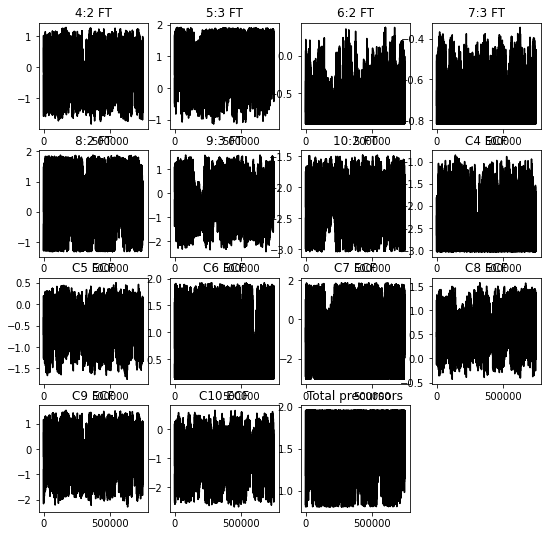

In [9]:
posterior.show_traces()

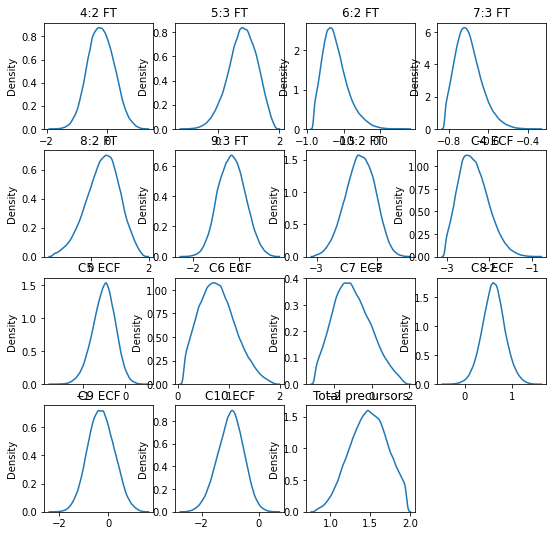

In [10]:
posterior.show_kdes()

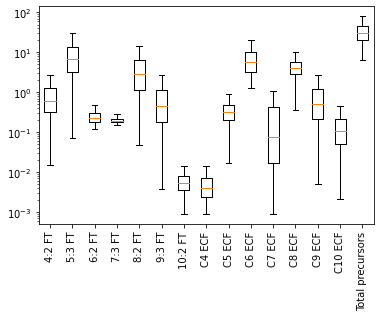

In [11]:
posterior.boxplot()

(<Figure size 432x288 with 1 Axes>, <Axes: ylabel='Concentration'>)

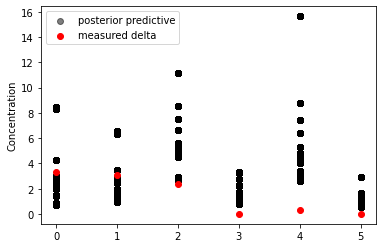

In [16]:
top_delta = [c.value for k,c in measurements.PFCAs.items()]
posterior.posterior_predictive(top_delta=top_delta, n_posterior=5000)

In [13]:
# OUTPUT_FILE = f'infer_out/{sample_name}.npy'
# posterior.save(OUTPUT_FILE)

In [14]:
# from src.posterior import Posterior
# # won't be able to do the posterior predictive with this saved format
# posterior = Posterior.from_npy(f'infer_out/{sample_name}.npy', 
#                                ['4:2 FT',
#                                '5:3 FT',
#                                '6:2 FT',
#                                '7:3 FT',
#                                '8:2 FT',
#                                '9:3 FT',
#                                '10:2 FT',
#                                'C4 ECF',
#                                'C5 ECF',
#                                'C6 ECF',
#                                'C7 ECF',
#                                'C8 ECF',
#                                'C9 ECF',
#                                'C10 ECF'])